# Ethereum Fraud Detection EDA
Kaggle Link: https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('transaction_dataset.csv')
df.head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [3]:
df = df.iloc[:,1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

In [4]:
#Remove leading spaces
df.columns = df.columns.str.lstrip()

In [5]:
pd.set_option('display.float_format', '{:,.3f}'.format)

df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,"9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,841.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000","9,012.000"
mean,0.221,"5,086.879","8,004.851","218,333.258",115.932,163.701,3.730,30.361,25.840,43.845,523.152,100.712,4.800,314.617,44.756,0.000,0.000,0.000,283.362,"10,160.923","11,638.319",0.000,"1,477.395",36.256,"129,620,673.244","13,868,492.609",110.939,5.638,7.599,0.003,4.902,0.000,0.000,0.000,0.000,485.615,"125,252,360.152","4,346,203.069","11,741.257","13,035,935.152","6,318,389.135",0.000,0.000,0.000,1.385,4.827
std,0.415,"21,486.550","23,081.715","322,937.926",757.226,940.837,141.446,298.621,263.820,325.929,"13,008.822","2,885.002",138.610,"6,629.213",239.080,0.000,0.001,0.000,"1,352.404","358,322.712","364,204.773",0.001,"242,425.423",447.529,"10,538,584,109.428","1,180,389,999.860","6,128.635",105.252,81.818,0.066,17.247,0.000,0.000,0.000,0.000,"16,883.279","10,537,407,457.234","214,119,242.013","1,053,567.123","1,179,905,145.261","591,476,414.686",0.000,0.000,0.000,6.735,16.679
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"-15,605,352.040",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,316.930,1.000,1.000,0.000,1.000,1.000,0.001,1.000,0.427,0.000,0.165,0.086,0.000,0.000,0.000,4.000,0.226,2.670,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,17.340,509.770,"46,637.030",3.000,4.000,0.000,2.000,2.000,0.096,6.000,1.730,0.049,4.999,1.606,0.000,0.000,0.000,8.000,12.487,30.530,0.000,0.002,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,0.000,565.470,"5,480.390","304,070.980",11.000,27.000,0.000,5.000,3.000,2.000,67.067,22.000,0.999,61.521,21.999,0.000,0.000,0.000,54.000,100.999,101.000,0.000,0.045,3.000,100.337,0.000,0.000,0.000,2.000,0.000,2.000,0.000,0.000,0.000,0.000,0.002,99.000,29.465,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
max,1.000,"430,287.670","482,175.490","1,954,860.950","10,000.000","10,000.000","9,995.000","9,999.000","9,287.000","10,000.000","800,000.000","283,618.832","12,000.000","520,000.000","12,000.000",0.020,0.046,0.023,"19,995.000","28,580,960.890","28,581,590.070",0.046,"14,288,636.26

In [6]:
#Check duplicated
duplicate_address = df['Address'].value_counts()[df['Address'].value_counts() > 1]
print(f"Count of duplicated address rows: {duplicate_address.count()}")
#print("\n")
print(duplicate_address)

Count of duplicated address rows: 25
Address
0x4cd526aa2db72eb1fd557b37c6b0394acd35b212    2
0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f    2
0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1    2
0x4c24af967901ec87a6644eb1ef42b680f58e67f5    2
0x4c268c7b1d51b369153d6f1f28c61b15f0e17746    2
0x4c26a3c12a64f33a3546fbb206c5365ce8e82c20    2
0x4c271764eadcf0d07e5a937b2de290294c9d11c2    2
0x4c27438a77738153f6cf3ed890b2817d52ebf584    2
0x4c391cc032c9107b596267610a05262c90fc2df7    2
0x4c4a03e100b4b104355edc4c50ce12b9a2879547    2
0x4c4da560350e302232a184c8fa16b126a772c326    2
0x4c5b0709f66719861e7277c9dcda9175deb3d866    2
0x4c7520df888aa4569a37ac7d132f89c65821f0af    2
0x4c77f6b01da78d053d5885e43bce5239b623dd3e    2
0x4c7accc2689708892be29256fbe9d45a92f0aa97    2
0x4c7f6d5b287054bf41f9d49ea8d2ca6e6837850b    2
0x4c97ccdaa61ca167e8a3b4d425ae6fbf16bcb39c    2
0x4cad652b71519a7a68d05dada31122c4c9a5ed95    2
0x4cb6f8f060365dd2e4eb949609dd6293bb950ae2    2
0x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb9 

In [7]:
#Check duplicated rows
df.loc[df['Address'] == '0x4cce03d1fd8aa1d6172cec74d75bd1df9e6a8ac2']

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2929,0x4cce03d1fd8aa1d6172cec74d75bd1df9e6a8ac2,0,0.000,0.000,89.100,1,1,0,1,1,1.015,1.015,1.015,1.012,1.012,1.012,0.000,0.000,0.000,2,1.012,1.015,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0
2954,0x4cce03d1fd8aa1d6172cec74d75bd1df9e6a8ac2,0,0.000,0.000,89.100,1,1,0,1,1,1.015,1.015,1.015,1.012,1.012,1.012,0.000,0.000,0.000,2,1.012,1.015,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0


In [8]:
#Drop Duplicate Addresses
df = df.drop_duplicates(subset='Address', keep='first')
df.shape

(9816, 49)

In [9]:
# Check missing value
df.isna().sum()

Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contra

I reviewed several wallets with missing values and found no matching entries in the ERC-20 token transfer records. Based on this observation, I assumed these wallets had no ERC-20 activity and decided to impute all ERC-20–related columns with 0 to reflect the absence of transfers.

In [10]:
# Fill missing value with 0
df.fillna(0, inplace=True)

In [11]:
#Create dummies
df[['received_higher_sent']] = 0
df.loc[df['avg val received'] > df['avg val sent'], 'received_higher_sent'] = 1

df[['ERC20_received_higher_sent']] = 0
df.loc[df['ERC20 total Ether received'] > df['ERC20 total ether sent'], 'ERC20_received_higher_sent'] = 1

In [12]:
#save for EDA & visualization
df.to_csv('final.csv', index=False)

## EDA

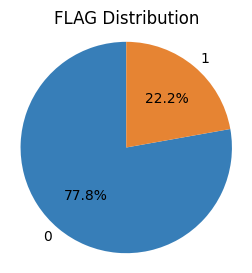

FLAG
0    7637
1    2179
Name: count, dtype: int64


In [13]:
# Check FLAG
flag_counts = df['FLAG'].value_counts()

# Pie chart
plt.figure(figsize=(3,3))
plt.pie(
    flag_counts, 
    labels=flag_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#377eb8','#e68433']
)
plt.title('FLAG Distribution')
plt.axis('equal')  # Equal aspect ratio ensures circle shape
plt.show()

print(df['FLAG'].value_counts())

Out of 9,816 addresses, 22.2% were flagged as suspicious accounts, indicating that the majority of addresses are not considered suspicious.

In [14]:


def summarize_by_flag(df, column):
    # Summary statistics
    summary = df[['FLAG', column]].groupby('FLAG').agg(['count', 'min', 'median', 'mean', 'max'])

    # Calculate y-axis limits from FLAG means
    means = df.groupby('FLAG')[column].mean()
    upper = means.max() * 1.1

    # Create side-by-side layout
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Left: Boxplot
    sns.boxplot(data=df, x='FLAG', y=column, ax=axes[0])
    axes[0].set_title(f'Box Plot of {column} by FLAG')
    axes[0].set_xlabel('FLAG')
    axes[0].set_ylabel(column)
    axes[0].set_ylim(0, upper)

    # Right: Centered summary table as text
    axes[1].axis('off')
    table_text = summary.round(2).astype(str).to_string()
    axes[1].text(
        0.5, 0.5, table_text,
        fontsize=10,
        fontfamily='monospace',
        verticalalignment='center',
        horizontalalignment='center'
    )

    plt.tight_layout()
    plt.show()



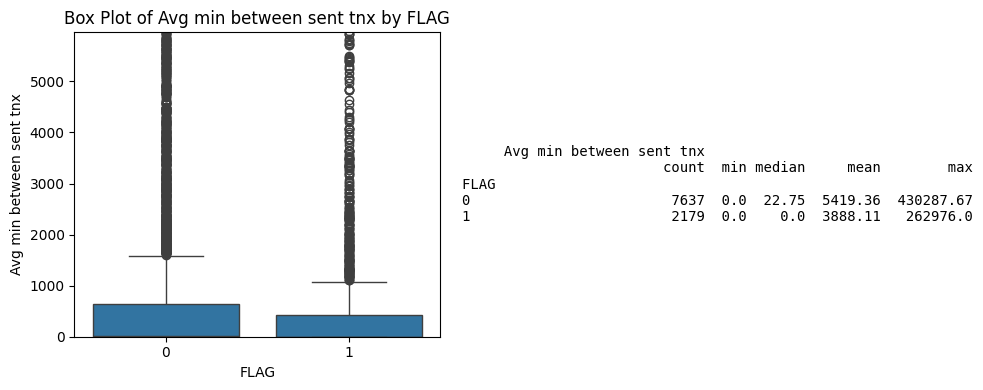

In [15]:
#Transaction and Behavior Analysis
summarize_by_flag(df,'Avg min between sent tnx')

Over 50% of phishing addresses sent transactions instantly (0 minutes), as shown by the median of 0. In contrast, some delays stretched as long as 182 days (≈ 263,000 minutes). Non-phishing addresses had a higher median sent of about 22.75 minutes, with the longest delay exceeding 298 days (≈ 430,000 minutes). This suggests that phishing wallets tend to act more immediately after activation.

Additionally, phishing wallets exhibit more ‘burst’ activity, rapidly executing transactions upon activation, whereas non-phishing wallets show greater variability in timing, potentially indicating more typical or sustained usage patterns.

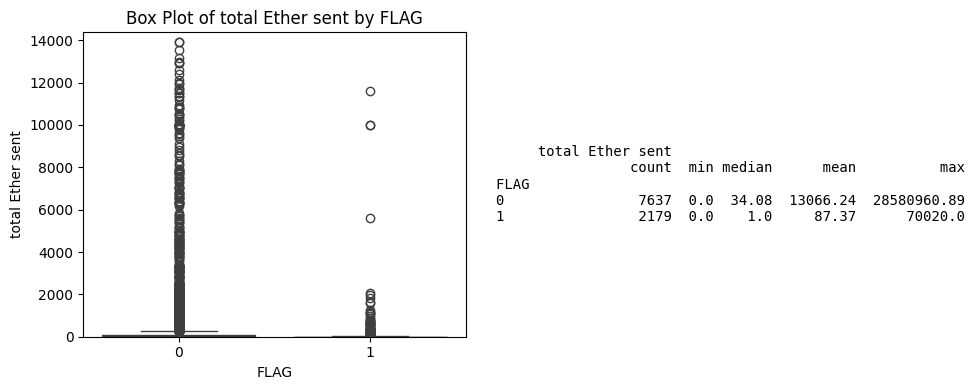

In [16]:
summarize_by_flag(df,'total Ether sent')

Normal addresses show varied ETH sending behavior, but for phishing addresses, 50% of them sent around 0–1 ETH to victims, indicating a tendency to transfer small amounts.

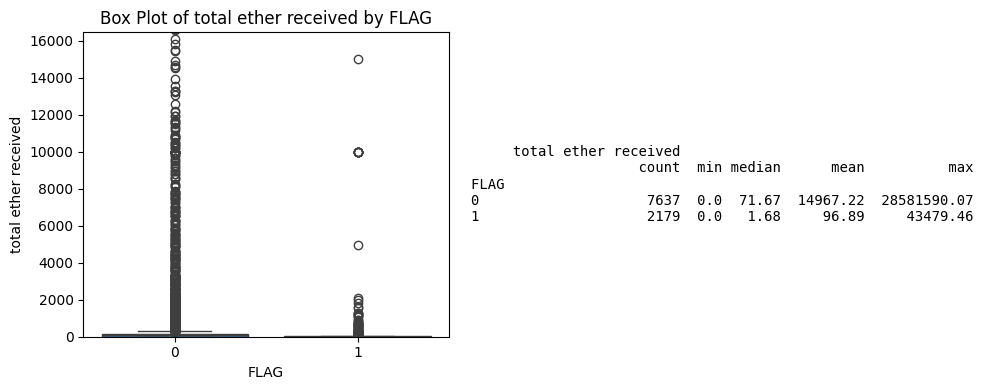

In [17]:
summarize_by_flag(df,'total ether received')

While the amount of ETH received by normal addresses varies widely, phishing addresses tend to receive significantly smaller amounts, with 50% of them receiving less than 2 ETH.

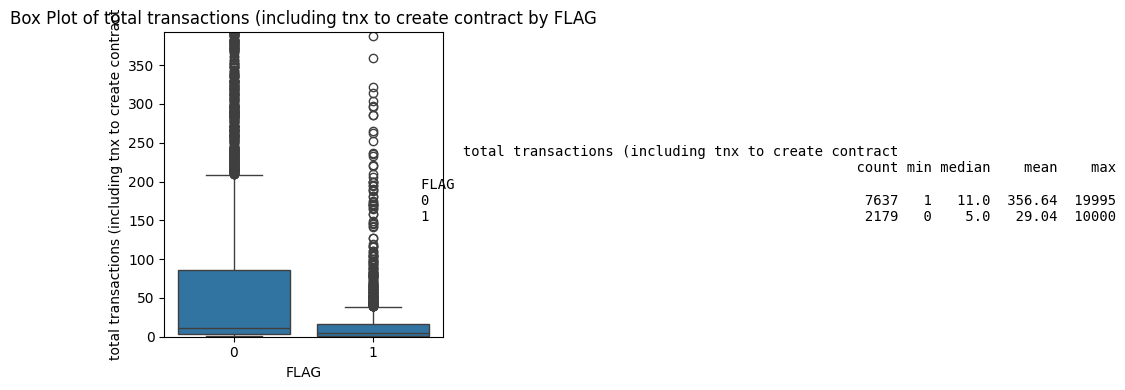

In [18]:
summarize_by_flag(df,'total transactions (including tnx to create contract')

Normal addresses tend to be involved in more transactions overall, with a median of 11 transactions and a much higher average of 356. In contrast, phishing addresses typically engage in fewer transactions, with a median of just 5 and an average of 29. This suggests that phishing wallets may be created for short-term use, focusing on fewer, targeted interactions before being abandoned or blacklisted.

In [19]:
#Tak a look at flagged account which total transaction over 10,000:
df.loc[(df['FLAG'] == 1) & (df['total transactions (including tnx to create contract'] == 10000)]

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type,received_higher_sent,ERC20_received_higher_sent
8097,0x311f71389e3de68f7b2097ad02c6ad7b2dde4c71,1,0.000,2.000,"20,032.120",0,9999,1,1901,0,0.000,300.000,0.495,0.000,0.000,0.000,0.000,0.000,0.000,10000,0.000,"4,944.800",0.000,"4,944.800",21.000,"1,894.681",0.000,0.000,0.000,15.000,0.000,15.000,0.000,0.000,0.000,0.000,0.000,"1,000.000",90.223,0.000,0.000,0.000,0.000,0.000,0.000,0.000,15.000,,Ethereum,1,1


* The address is a contract address (not a regular wallet).
* It has no outgoing ETH transactions, but it received 9,999 transactions totaling 4,944.8 ETH, along with 1,894.68 ETH in ERC20 tokens.
* It interacted with 1,901 unique senders.
* It received a high number of small transactions, with an average received amount of just 0.5 ETH.
* The contract only receives funds — it does not send any out.

This address is a smart contract that has received nearly 5,000 ETH from about 10,000 transactions, yet shows no outgoing ETH activity. This one-way pattern is highly suspicious and may indicate a scam — possibly one where victims were tricked into interacting with a malicious contract (e.g., by clicking a deceptive link or unknowingly signing a harmful transaction). Since the funds only flow in and never out, the contract could be designed to trap ETH without providing any legitimate function in return.



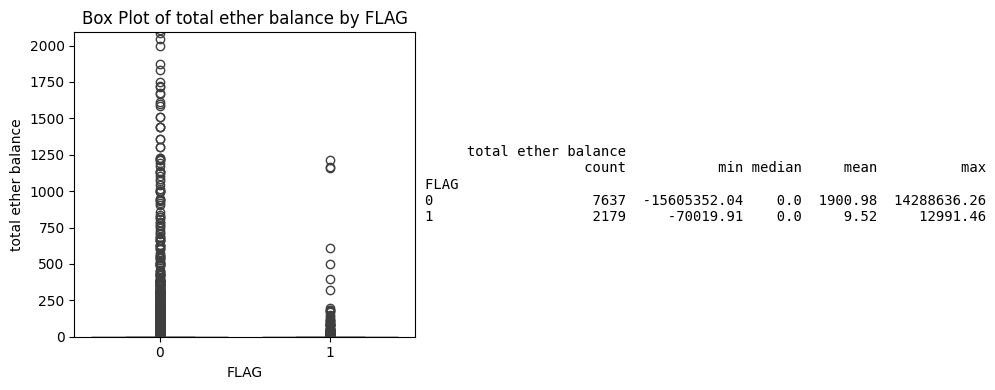

In [20]:
summarize_by_flag(df,'total ether balance')

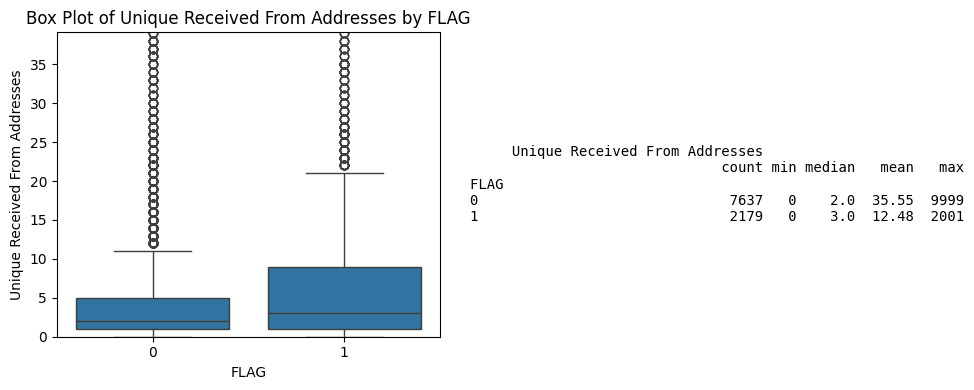

In [21]:
summarize_by_flag(df,'Unique Received From Addresses')

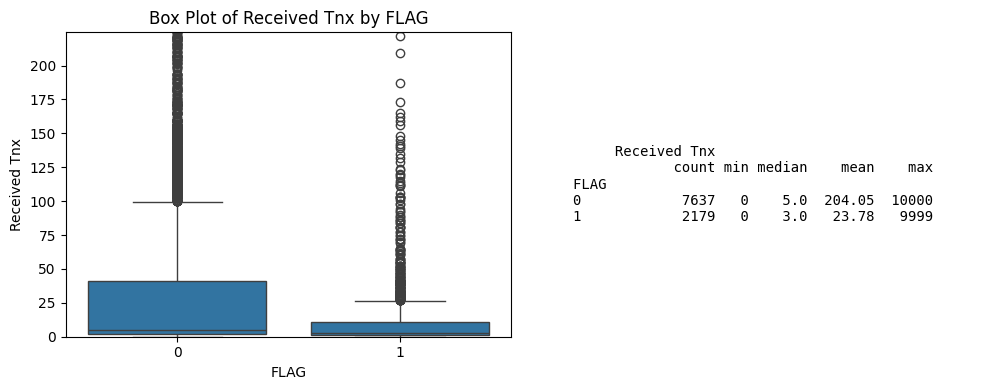

In [22]:
summarize_by_flag(df,'Received Tnx')

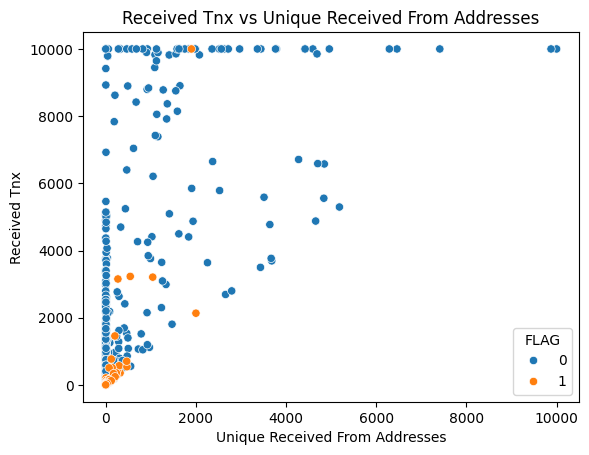

In [23]:
sns.scatterplot(data=df, x='Unique Received From Addresses', y='Received Tnx', hue='FLAG')
plt.title('Received Tnx vs Unique Received From Addresses')
plt.xlabel('Unique Received From Addresses')
plt.ylabel('Received Tnx')
plt.show()

The scatter plot reveals distinct behavioral patterns between non-phishing and phishing wallets.

For non-phishing wallets (blue), many addresses receive a high volume of transactions from a relatively small number of unique senders. This results in a dense vertical cluster along the left side of the plot—indicating frequent interaction with a limited group (e.g., repeat users or known counterparties).

In contrast, phishing wallets (red) show a more linear relationship between Received Tnx and Unique Received From Addresses. As the number of unique senders increases, the number of received transactions also increases — but both remain at significantly lower volumes compared to non-phishing addresses. This pattern indicates that phishing wallets often receive small numbers of transactions from many different users, likely victims who each send funds only once.

Overall, non-phishing wallets display sustained or repeated usage patterns, while phishing wallets exhibit low-volume, opportunistic behavior that aligns with attack bursts.

In [24]:
def bar_chart(df, column):
    data = df.groupby(['FLAG', column]).size().reset_index(name='count')

    plt.figure(figsize=(6, 4))  # 👈 Change figure size here
    ax = sns.barplot(data=data, x='FLAG', y='count', hue=column)
    plt.title(f"Transaction Pattern by FLAG and {column}")
    plt.xlabel("FLAG")
    plt.ylabel("Count")
    plt.legend(title=column)
    plt.tight_layout()
    
    # Add data labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        fontsize=9, color='black', xytext=(0, 3),
                        textcoords='offset points')

    plt.show()



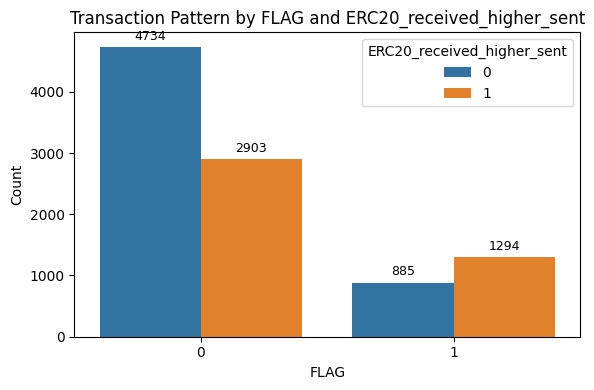

In [25]:
bar_chart(df,'ERC20_received_higher_sent')

* Fraudulent wallets (FLAG = 1) have a lower volume of ERC20 transactions compared to normal wallets.
* A higher number of fraudulent wallets received more ERC20 tokens than they sent, suggesting they tend to accumulate tokens rather than distribute them.
* Normal wallets (FLAG = 0) are more likely to send more or equal ERC20 tokens than they receive, reflecting more typical user behavior.

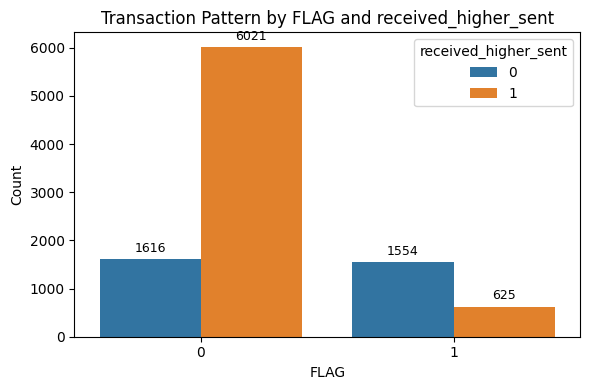

In [26]:
bar_chart(df,'received_higher_sent')

Only 28.68% of suspicious (fraudulent) addresses received more ETH than they sent, whereas the majority of normal addresses (78.84%) had received more than they sent.

Suspicious addresses are more likely to send out ETH rather than receive it, suggesting a pattern of fund distribution, possibly to other wallets or mixers. In contrast, normal addresses typically show inbound activity, which is more aligned with standard user or investor behavior. This difference in flow direction may be a strong indicator of fraudulent intent.